In [2]:
import pandas as pd

In [14]:
#Leemos los .json y los convertimos a dataframe para trabajar con ellos


# Leer el archivo JSON para dataframe_final_palas con lines=True
df_palas = pd.read_json('dataframe_final_palas.json', orient='records', lines=True)

# Leer el archivo JSON para dataframe_final_formulario con lines=True
df_formulario = pd.read_json('dataframe_final_formulario.json', orient='records', lines=True)

# Mostrar los DataFrames
print("DataFrame para dataframe_final_palas:")
print(df_palas)

print("\nDataFrame para dataframe_final_formulario:")
print(df_formulario)

DataFrame para dataframe_final_palas:
                                 producto.nombre  producto.precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024           149.95   
1                            KOMBAT MM3 PRO 2024           125.00   
2                          SIUX ASTRA 3.0 HYBRID            59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024           161.95   
4                          PALA SIUX FENIX II 3K            89.95   
..                                           ...              ...   
958                  ADIDAS PRO CARBON CTRL GOLD           110.95   
959              ADIDAS METALBONE YOUTH 3.1 2022            71.95   
960                 WILSON BELA ELITE V2.5 PADEL           165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023           105.95   
962                           LOK MAXX HYPE 2024           260.00   

                                          producto.url  \
0    https://www.padelnuestro.com/nox-at-genius-att...   
1    https://www.

Version de Recomendaciones con RandomForestRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Hemos de buscar las caracteristicas mas relevantes tanto del del dataframe formulario (registros del usuario) como del dataframe de palas

#DATAFRAME PALAS 

# Seleccionar características relevantes en el dataframe de_palas (dataframe_palas_formulario)


features_relevantes_pala= ['producto.precio','balance', 'núcleo', 'cara', 
            'dureza', 'nivel de juego','forma', 
            'superfície', 'tipo de juego', 'nivel_de_juego_numeric']




#DATAFRAME FORMULARIO(df_formulario)

# Seleccionar características relevantes en el dataframe formulario (caracteristicas del usuario)

df_formulario = df_formulario.rename(columns={
    'Cuantas horas juega a la semana': 'horas_semana',
    'Indique su peso': 'peso',
    'Indique su altura': 'altura',
    'Rango de precio dispuesto a pagar': 'rango_precio_pala',
    'Indique su lado de juego': 'lado_juego',
    'Indique su nivel de juego': 'nivel_juego',
    'Tipo de juego': 'tipo_juego',
    'Que tipo de balance te gusta': 'balance_pala',
    'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros': 'tipo_lesion',
    'Con que frecuencia': 'frecuencia_lesion',
    'Hace cuanto': 'tiempo_desde_ultima_lesion',
    'nivel_de_juego': 'nivel',

})

features_relevantes_formulario = [
    'horas_semana', 
    'peso', 
    'altura', 
    'rango_precio_pala', 
    'lado_juego', 
    'nivel_juego', 
    'tipo_juego', 
    'balance_pala', 
    'tipo_lesion', 
    'frecuencia_lesion', 
    'tiempo_desde_ultima_lesion'
    'nivel'
]



# Convertir variables categóricas en numéricas
encoder = LabelEncoder()

dataframe_palas_encoded = dataframe_palas_formulario.copy()

for feature in features:
    if dataframe_palas_encoded[feature].dtype == 'object':
        dataframe_palas_encoded[feature] = encoder.fit_transform(dataframe_palas_encoded[feature].astype(str))

# Definir características y variable objetivo
X = dataframe_palas_encoded[features]
y = dataframe_palas_encoded['Score_Escalar']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre todo el conjunto para obtener recomendaciones
dataframe_palas_encoded['predicted_score'] = model.predict(X)

# Función para recomendar las mejores palas
def recomendar_palas(score):
    # Calcular la diferencia absoluta entre el score real y predicho
    dataframe_palas_encoded['score_diff'] = abs(dataframe_palas_encoded['predicted_score'] - score)
    # Ordenar por la menor diferencia y seleccionar las 3 mejores palas
    top_palas = dataframe_palas_encoded.sort_values(by='score_diff').head(3)['producto.nombre']
    return top_palas.tolist()

# Aplicar la función para recomendar las mejores palas por registro
dataframe_palas_formulario['recomendaciones'] = dataframe_palas_formulario['Score_Escalar'].apply(recomendar_palas)

# Mostrar el DataFrame final con las recomendaciones
print(dataframe_palas_formulario[['producto.nombre', 'Score_Escalar', 'nivel_de_juego_numeric', 'recomendaciones']])



Index(['Cuantas horas juega a la semana', 'Indique su peso',
       'Indique su altura', 'Rango de precio dispuesto a pagar',
       'Indique su lado de juego', 'Indique su nivel de juego',
       'Tipo de juego', 'Que tipo de balance te gusta',
       'Has tenido alguna de las siguientes lesiones previamente lumbares, epicondilitis, gemelos, fascitis, cervicales u hombros',
       'Con que frecuencia', 'Hace cuanto', 'Score', 'Score_Escalar',
       'nivel_de_juego', 'palas_recomendadas'],
      dtype='object')


KeyboardInterrupt: 

Version de Recomendaciones con XGBoost

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Supongamos que dataframe_palas_formulario ya está definido con las columnas necesarias

# Seleccionar características relevantes
features = ['producto.caracteristicas', 'balance', 'núcleo', 'cara', 
            'formato', 'dureza', 'nivel de juego', 'acabado', 'forma', 
            'superfície', 'tipo de juego', 'nivel_de_juego_numeric']

# Convertir variables categóricas en numéricas
encoder = LabelEncoder()
dataframe_palas_encoded = dataframe_palas_formulario.copy()

for feature in features:
    if dataframe_palas_encoded[feature].dtype == 'object':
        dataframe_palas_encoded[feature] = encoder.fit_transform(dataframe_palas_encoded[feature].astype(str))

# Definir características y variable objetivo
X = dataframe_palas_encoded[features]
y = dataframe_palas_encoded['Score_Escalar']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre todo el conjunto para obtener recomendaciones
dataframe_palas_encoded['predicted_score'] = model.predict(X)

# Función para recomendar las mejores palas
def recomendar_palas(score):
    # Calcular la diferencia absoluta entre el score real y predicho
    dataframe_palas_encoded['score_diff'] = abs(dataframe_palas_encoded['predicted_score'] - score)
    # Ordenar por la menor diferencia y seleccionar las 3 mejores palas
    top_palas = dataframe_palas_encoded.sort_values(by='score_diff').head(3)['producto.nombre']
    return top_palas.tolist()

# Aplicar la función para recomendar las mejores palas por registro
dataframe_palas_formulario['recomendaciones'] = dataframe_palas_formulario['Score_Escalar'].apply(recomendar_palas)

# Mostrar el DataFrame final con las recomendaciones
print(dataframe_palas_formulario[['producto.nombre', 'Score_Escalar', 'nivel_de_juego_numeric', 'recomendaciones']])


                                   producto.nombre  Score_Escalar  \
0      NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024       0.253731   
1                              KOMBAT MM3 PRO 2024       0.216418   
2                            SIUX ASTRA 3.0 HYBRID       0.201493   
3           NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024       0.253731   
4                            PALA SIUX FENIX II 3K       0.216418   
...                                            ...            ...   
93307                                          NaN       0.701493   
93308                                          NaN       0.686567   
93309                                          NaN       0.723881   
93310                                          NaN       0.686567   
93311                                          NaN       0.671642   

       nivel_de_juego_numeric  \
0                         1.0   
1                         1.0   
2                         0.0   
3                         1.0   
4     

In [37]:
# Mostrar las primeras 30 recomendaciones
print(dataframe_palas_formulario[['nivel_de_juego_numeric', 'recomendaciones']].head(30))

    nivel_de_juego_numeric                                    recomendaciones
0                      1.0  [NOX PACK AT GENIUS LIMITED EDITION 2024, DUNL...
1                      1.0  [BLACK CROWN WOLF, BLACK CROWN PITON 11 SOFT 2...
2                      0.0  [VIBOR-A KING COBRA ELITE 24K, DUNLOP BOOST LI...
3                      1.0  [NOX PACK AT GENIUS LIMITED EDITION 2024, DUNL...
4                      1.0  [BLACK CROWN WOLF, BLACK CROWN PITON 11 SOFT 2...
5                      1.0  [VIBOR-A KING COBRA ELITE 24K, DUNLOP BOOST LI...
6                      1.0  [BLACK CROWN WOLF, BLACK CROWN PITON 11 SOFT 2...
7                      2.0  [BLACK CROWN PITON 2.0, STARVIE JUNIOR 2024, N...
8                      1.0  [ADIDAS ADIPOWER LIGHT 3.3, BABOLAT TECHNICAL ...
9                      1.0  [VIBOR-A KING COBRA ELITE 24K, DUNLOP BOOST LI...
10                     1.0  [ADIDAS ADIPOWER LIGHT 3.3, BABOLAT TECHNICAL ...
11                     1.0  [DUNLOP TITAN 2.0 AMARILLA AZUL, DUN

In [40]:
# Supongamos que dataframe_palas_formulario ya está definido con las columnas necesarias

# Inicializar una lista para almacenar los packs de recomendaciones
packs_recomendaciones = []

# Iterar sobre los primeros 100 registros para obtener las recomendaciones
for index, row in dataframe_palas_formulario.head(100).iterrows():
    for pala in row['recomendaciones']:
        # Filtrar la información relevante de cada pala recomendada
        pala_info = dataframe_palas_formulario[
            dataframe_palas_formulario['producto.nombre'] == pala
        ][[
            'producto.nombre', 'balance', 'dureza', 'núcleo', 'cara', 'forma', 'superfície', 'tipo de juego'
        ]]
        
        # Añadir la información de la pala al pack de recomendaciones
        packs_recomendaciones.append(pala_info)

# Concatenar todos los packs de recomendaciones en un solo DataFrame
primeros_100_packs_recomendaciones = pd.concat(packs_recomendaciones).reset_index(drop=True)

# Mostrar el DataFrame con los primeros 100 packs de recomendaciones
print(primeros_100_packs_recomendaciones)



                             producto.nombre balance  dureza         núcleo  \
0    NOX PACK AT GENIUS LIMITED EDITION 2024   medio    dura      black eva   
1                  DUNLOP IMPACT PRO HL PINK   medio   media     medium eva   
2                        BULLPADEL VERTEX 04    alto    dura       multieva   
3                           BLACK CROWN WOLF    bajo  blanda       soft eva   
4             BLACK CROWN PITON 11 SOFT 2023    bajo    None            eva   
..                                       ...     ...     ...            ...   
295                  VAIRO COMPACT SIGNATURE   medio   media            eva   
296                 BULLPADEL BUKET X SERIES    bajo    None       soft eva   
297                        SIUX EVOQUE 3 AIR   medio  blanda  ultrasoft eva   
298             NOX TL10 BY TINO LIBAAK 2024    alto   media           None   
299                   BABOLAT AIR VERON 2024   medio    None            eva   

                         cara     forma superfície 

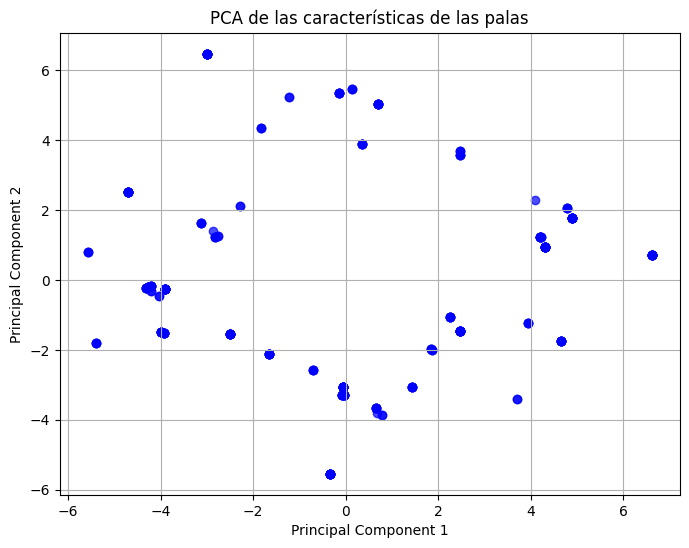

Cargas de los componentes principales:
       balance    dureza    núcleo      cara     forma  superfície  \
PC1  0.026792  0.082252 -0.802106 -0.587623  0.025384    0.053891   
PC2 -0.085946 -0.059842  0.582555 -0.805033  0.010980    0.009811   

     tipo de juego  
PC1        0.01710  
PC2        0.03698  
Correlación entre características:
                 balance    dureza    núcleo      cara     forma  superfície  \
balance        1.000000 -0.022497 -0.144215  0.080679  0.341111   -0.169694   
dureza        -0.022497  1.000000 -0.277327 -0.042393  0.189366    0.011864   
núcleo        -0.144215 -0.277327  1.000000  0.166782 -0.034087   -0.276316   
cara           0.080679 -0.042393  0.166782  1.000000 -0.078055   -0.263285   
forma          0.341111  0.189366 -0.034087 -0.078055  1.000000    0.231762   
superfície    -0.169694  0.011864 -0.276316 -0.263285  0.231762    1.000000   
tipo de juego -0.282710  0.447549  0.009732 -0.097644 -0.154957   -0.014126   

               tipo 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que primeros_100_packs_recomendaciones ya está definido con las columnas necesarias

# Seleccionar características relevantes
relevant_features = ['balance', 'dureza', 'núcleo', 'cara', 'forma', 'superfície', 'tipo de juego']

# Convertir variables categóricas en numéricas
encoder = LabelEncoder()
for feature in relevant_features:
    if primeros_100_packs_recomendaciones[feature].dtype == 'object':
        primeros_100_packs_recomendaciones[feature] = encoder.fit_transform(primeros_100_packs_recomendaciones[feature])

# Aplicar PCA para reducir la dimensionalidad a 2 componentes para visualización 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(primeros_100_packs_recomendaciones[relevant_features])

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización 2D de PCA
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.7, c='blue')
plt.title('PCA de las características de las palas')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_, columns=relevant_features, index=['PC1', 'PC2'])
print("Cargas de los componentes principales:\n", cargas)

# Correlación entre características
correlacion = primeros_100_packs_recomendaciones[relevant_features].corr()
print("Correlación entre características:\n", correlacion)


